In [1]:
%%HTML
<video width="1100" height="340" controls>
  <source src="video.mp4" type="video/mp4">
</video>

# <center>Proyecto: Estancias Infantiles Tamaulipas</center>
<center><img src="estancias.png"/></center>

### 1. Objetivo:
    - Trabajar con archivos CSV entregados por la Dependencia para lograr mostrar alcanses del Programa en la Entidad de Tamaulipas
    - La fuente de datos es extraida del servidor de la Dependencia, corresponde al corte del ejercicio fiscal 2018, una vez que se analicen los resultados se dará autorización para trabajar sobre toda la base completa y de todos los ejercicios fiscales
 ---
### 2. Desarrollo:

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Realizamos la lectura de datos en formato CSV, que son con las que vamos a trabajar

In [3]:
estancias = pd.read_csv("estancias.csv", index_col="id_estancia")
estancias.head()

,entidad,municipio,localidad,estatus,nombre_estancia,paterno_responsable,materno_responsable,nombre_responsable,ejercicio_fiscal
id_estancia,,,,,,,,,
135,tamaulipas,victoria,ciudad victoria,operacion,mi angelito azul,moreno,de leon,mireya,2007
147,tamaulipas,victoria,ciudad victoria,operacion,capullitos,cabrera,rodriguez,araceli,2007
151,tamaulipas,reynosa,reynosa,operacion,campanita,granados,requena,josefina,2007
163,tamaulipas,victoria,ciudad victoria,operacion,gotitas de amor,lopez,castillo,elvia,2007
181,tamaulipas,victoria,ciudad victoria,operacion,casita feliz 1,portillo,salazar,sofia lidia,2007


In [4]:
menores = pd.read_csv("menores.csv", index_col="id_del_menor")
menores.head()

,nombre,apellido_paterno,apellido_materno,nombre_mpt,paterno_mpt,materno_mpt,id_estancia,municipio,nombre_estancia
id_del_menor,,,,,,,,,
3852943,liam yasser,avalos,carreras,edith guadalupe,carreras,pesina,4919,abasolo,pitufines
4401848,rodolfo adair,marquez,teran,yovaneth guadalupe,teran,acuna,4919,abasolo,pitufines
3682440,kendra mabel,mendez,villa,aleyda margarita,villa,ramirez,4919,abasolo,pitufines
4161957,aidan alejandro,gonzalez,mendez,mirna lucia,mendez,olivares,4919,abasolo,pitufines
4079713,tadeo,balderas,luna,ana silvia,luna,pesina,4919,abasolo,pitufines


In [5]:
polizas = pd.read_csv("polizas.csv", index_col="id_poliza")
polizas.head()

,id_estancia,municipio,aseguradora,numero_de_poliza,capacidad_de_la_poliza,poliza_pagada
id_poliza,,,,,,
1,406,victoria,seguros inbursa sa,11601-30087325,60,si
2,1073,matamoros,axa seguros sa de cv,RNA942870000,27,si
3,151,reynosa,axa seguros sa de cv,ENA892670000,45,si
4,147,victoria,seguros inbursa sa,11601-30053450,41,si
5,1103,ciudad madero,seguros el potosi,RCGE-2638,30,si


In [6]:
datos_tamaulipas = pd.read_csv("datos_tamaulipas.csv", index_col="id_estancia")
datos_tamaulipas.head()

,entidad,municipio,localidad,estatus,nombre_estancia,paterno_responsable,materno_responsable,nombre_responsable,ejercicio_fiscal,menores_inscritos,capacidad_instalada,aseguradora,numero_de_poliza
id_estancia,,,,,,,,,,,,,
135,tamaulipas,victoria,ciudad victoria,operacion,mi angelito azul,moreno,de leon,mireya,2007,44,60,seguros inbursa sa,11601-30076612
147,tamaulipas,victoria,ciudad victoria,operacion,capullitos,cabrera,rodriguez,araceli,2007,22,41,seguros inbursa sa,11601-30053450
151,tamaulipas,reynosa,reynosa,operacion,campanita,granados,requena,josefina,2007,39,45,axa seguros sa de cv,ENA892670000
163,tamaulipas,victoria,ciudad victoria,operacion,gotitas de amor,lopez,castillo,elvia,2007,11,31,grupo nacional provincial,104747258
181,tamaulipas,victoria,ciudad victoria,operacion,casita feliz 1,portillo,salazar,sofia lidia,2007,48,60,seguros inbursa sa,11601-30053405


In [7]:
menores_capital = pd.read_csv("menores_capital.csv", index_col="id_estancia")
menores_capital.head()

,id_del_menor,nombre,apellido_paterno,apellido_materno,nombre_mpt,paterno_mpt,materno_mpt,municipio,region_ciudad,edad,sexo,altura_cm,peso_kg
id_estancia,,,,,,,,,,,,,
135,4336404,emii sofia,rodriguez,tovar,maria guadalupe,tovar,dominguez,victoria,oeste,1,F,72,7
135,4010004,victor francisco,andrade,monita,violeta,monita,baez,victoria,oeste,1,M,73,7
135,4049445,tadeo alejandro,gonzalez,cruz,karina lizeth,cruz,torres,victoria,oeste,1,M,79,8
135,4187474,francia monserrat,ruiz,zapata,grecia itzel,zapata,rodriguez,victoria,oeste,1,F,74,7
135,4189466,isaac mateo,maldonado,garza,laura patricia,garza,ortiz,victoria,oeste,1,M,78,8


In [8]:
estancias_en_victoria = pd.read_csv("estancias_en_victoria.csv", index_col="id_estancia")
estancias_en_victoria.head()

,entidad,municipio,localidad,estatus,nombre_estancia,paterno_responsable,materno_responsable,nombre_responsable,ejercicio_fiscal,menores_inscritos,capacidad_instalada,aseguradora,numero_de_poliza,inscripciones_disponibles,inscripciones_disponibles_2017
id_estancia,,,,,,,,,,,,,,,
135,tamaulipas,victoria,ciudad victoria,operacion,mi angelito azul,moreno,de leon,mireya,2007,44,60,seguros inbursa sa,11601-30076612,16,20
147,tamaulipas,victoria,ciudad victoria,operacion,capullitos,cabrera,rodriguez,araceli,2007,22,41,seguros inbursa sa,11601-30053450,19,22
163,tamaulipas,victoria,ciudad victoria,operacion,gotitas de amor,lopez,castillo,elvia,2007,11,31,grupo nacional provincial,104747258,20,19
181,tamaulipas,victoria,ciudad victoria,operacion,casita feliz 1,portillo,salazar,sofia lidia,2007,48,60,seguros inbursa sa,11601-30053405,12,23
369,tamaulipas,victoria,ciudad victoria,operacion,casita feliz 2,berrones,alonzo,maria gabriela,2007,46,46,seguros inbursa sa,11601-30053717,0,4


- Tipo de datos de nuetros DataFrames

In [9]:
estancias.dtypes

entidad                object
municipio              object
localidad              object
estatus                object
nombre_estancia        object
paterno_responsable    object
materno_responsable    object
nombre_responsable     object
ejercicio_fiscal        int64
dtype: object

In [10]:
# menores.dtypes

In [11]:
# polizas.dtypes

In [12]:
# datos_tamaulipas.dtypes

### - Estadistico de nuetros DataFrames "datos_tamaulipas"

     -promedio y mediana de menores inscritos

In [13]:
datos_tamaulipas['menores_inscritos'].mean()

30.270758122743683

In [14]:
datos_tamaulipas['menores_inscritos'].median()

29.0

     -estadisticos de menores inscritos

In [15]:
datos_tamaulipas.menores_inscritos.describe()

count    277.000000
mean      30.270758
std       12.449418
min        2.000000
25%       21.000000
50%       29.000000
75%       37.000000
max       60.000000
Name: menores_inscritos, dtype: float64

In [16]:
print(f'Valor mínimo: {datos_tamaulipas["menores_inscritos"].min()}')
print(f'Percentil 0: {datos_tamaulipas["menores_inscritos"].quantile(0)}')
print(f'Percentil 10: {datos_tamaulipas["menores_inscritos"].quantile(0.1)}')
print(f'Percentil 25: {datos_tamaulipas["menores_inscritos"].quantile(0.25)}')
print(f'Percentil 50: {datos_tamaulipas["menores_inscritos"].median()}')
print(f'Mediana: {datos_tamaulipas["menores_inscritos"].quantile(0.5)}')
print(f'Percentil 75: {datos_tamaulipas["menores_inscritos"].quantile(0.75)}')
print(f'Percentil 90: {datos_tamaulipas["menores_inscritos"].quantile(0.9)}')
print(f'Percentil 100: {datos_tamaulipas["menores_inscritos"].quantile(1)}')
print(f'Valor máximo: {datos_tamaulipas["menores_inscritos"].max()}')

Valor mínimo: 2
Percentil 0: 2.0
Percentil 10: 15.600000000000001
Percentil 25: 21.0
Percentil 50: 29.0
Mediana: 29.0
Percentil 75: 37.0
Percentil 90: 48.400000000000006
Percentil 100: 60.0
Valor máximo: 60


     -estadisticos de capacidad_instalada

In [17]:
datos_tamaulipas.capacidad_instalada.describe()

count    277.000000
mean      41.693141
std       13.153073
min       12.000000
25%       31.000000
50%       40.000000
75%       54.000000
max       60.000000
Name: capacidad_instalada, dtype: float64

### - Consultas que solicita la Secretaría

    -Estancias en el municipio de Victoria

In [18]:
datos_tamaulipas[datos_tamaulipas["municipio"] == "victoria"] #se puede elegir cualquier municipio

,entidad,municipio,localidad,estatus,nombre_estancia,paterno_responsable,materno_responsable,nombre_responsable,ejercicio_fiscal,menores_inscritos,capacidad_instalada,aseguradora,numero_de_poliza
id_estancia,,,,,,,,,,,,,
135,tamaulipas,victoria,ciudad victoria,operacion,mi angelito azul,moreno,de leon,mireya,2007,44,60,seguros inbursa sa,11601-30076612
147,tamaulipas,victoria,ciudad victoria,operacion,capullitos,cabrera,rodriguez,araceli,2007,22,41,seguros inbursa sa,11601-30053450
163,tamaulipas,victoria,ciudad victoria,operacion,gotitas de amor,lopez,castillo,elvia,2007,11,31,grupo nacional provincial,104747258
181,tamaulipas,victoria,ciudad victoria,operacion,casita feliz 1,portillo,salazar,sofia lidia,2007,48,60,seguros inbursa sa,11601-30053405
369,tamaulipas,victoria,ciudad victoria,operacion,casita feliz 2,berrones,alonzo,maria gabriela,2007,46,46,seguros inbursa sa,11601-30053717
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25528,tamaulipas,victoria,ciudad victoria,operacion,cielo azul,hernandez,morales,pilar,2017,13,16,seguros inbursa sa,11601-30086282
25886,tamaulipas,victoria,ciudad victoria,operacion,colibries,carrizales,vega,ma joaquina,2018,24,32,axa seguros sa de cv,ENA897210000
25922,tamaulipas,victoria,ciudad victoria,operacion,burbujas,herrera,lopez,irma lizeth,2018,11,40,axa seguros sa de cv,ENA897470000


-Estancias que contrataron poliza con axa seguros sa de cv

In [19]:
datos_tamaulipas[datos_tamaulipas["aseguradora"] == "axa seguros sa de cv"] 
#se puede elegir culquier aseguradora

,entidad,municipio,localidad,estatus,nombre_estancia,paterno_responsable,materno_responsable,nombre_responsable,ejercicio_fiscal,menores_inscritos,capacidad_instalada,aseguradora,numero_de_poliza
id_estancia,,,,,,,,,,,,,
151,tamaulipas,reynosa,reynosa,operacion,campanita,granados,requena,josefina,2007,39,45,axa seguros sa de cv,ENA892670000
994,tamaulipas,reynosa,reynosa,operacion,el arca de noe,garcia,espericueta,yesenia,2007,41,43,axa seguros sa de cv,ENA899710000
998,tamaulipas,ciudad madero,ciudad madero,operacion,mis pinguitos,martinez,canedo,lucero guadalupe,2007,12,22,axa seguros sa de cv,RNA521250500
1073,tamaulipas,matamoros,heroica matamoros,operacion,carrusel,aviles,quijaz,martha elena,2007,20,27,axa seguros sa de cv,RNA942870000
1304,tamaulipas,reynosa,reynosa,operacion,manitas magicas,reyna,torres,angelica maria,2007,33,53,axa seguros sa de cv,RNA510020500
1305,tamaulipas,matamoros,heroica matamoros,operacion,girasoles,rodriguez,requena,maria isabel,2007,20,20,axa seguros sa de cv,RNA936950000
1306,tamaulipas,matamoros,heroica matamoros,operacion,getsemani,garcia,arcos,irma,2007,21,30,axa seguros sa de cv,RNA936250000
1309,tamaulipas,reynosa,reynosa,operacion,baby home,machado,perez,vianey,2007,26,29,axa seguros sa de cv,RNA511540500
1862,tamaulipas,reynosa,reynosa,operacion,las fuentes,guerrero,azocar,evelyn citlaly,2007,51,60,axa seguros sa de cv,RNA511510500


-Estancias con capacidad mayor a 50 

In [20]:
datos_tamaulipas[datos_tamaulipas["capacidad_instalada"] > 50] 
#se puede elegir menor, mayor o igual a cualquier cantidad

,entidad,municipio,localidad,estatus,nombre_estancia,paterno_responsable,materno_responsable,nombre_responsable,ejercicio_fiscal,menores_inscritos,capacidad_instalada,aseguradora,numero_de_poliza
id_estancia,,,,,,,,,,,,,
135,tamaulipas,victoria,ciudad victoria,operacion,mi angelito azul,moreno,de leon,mireya,2007,44,60,seguros inbursa sa,11601-30076612
181,tamaulipas,victoria,ciudad victoria,operacion,casita feliz 1,portillo,salazar,sofia lidia,2007,48,60,seguros inbursa sa,11601-30053405
406,tamaulipas,victoria,ciudad victoria,operacion,instituto sor juana ines de la cruz,huerta,limon,paulina monserrat,2007,55,60,seguros inbursa sa,11601-30087325
578,tamaulipas,tampico,tampico,operacion,alegrias,rivera,gonzalez,zita yadira,2007,56,60,seguros el potosi,RCGE-2177
640,tamaulipas,hidalgo,hidalgo,operacion,mis primeros pasos,grimaldo,leos,alma leticia,2007,24,60,seguros inbursa sa,11601-30062912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24252,tamaulipas,guemez,guemez,operacion,manitas,guillen,medrano,yuliam guadalupe,2015,37,58,axa seguros sa de cv,ENA901910000
24956,tamaulipas,victoria,ciudad victoria,operacion,rinconcito de luz,zavala,reyes,karla patricia,2016,43,53,seguros inbursa sa,11601-30086273
25524,tamaulipas,tampico,tampico,operacion,bety�s house,cervantes,mar,liliana,2017,35,52,axa seguros sa de cv,ENA902370000


-Estancias que aperturaron en 2018

In [21]:
estancias[estancias["ejercicio_fiscal"] == 2018] 
#se puede elegir cualquier ejercicio fiscal

,entidad,municipio,localidad,estatus,nombre_estancia,paterno_responsable,materno_responsable,nombre_responsable,ejercicio_fiscal
id_estancia,,,,,,,,,
25831,tamaulipas,jimenez,santander jimenez,operacion,divinos momentos,guevara,barrera,martha alicia,2018
25832,tamaulipas,san fernando,san fernando,operacion,chispitas de amor,cardoza,garcia,elsa yolanda,2018
25839,tamaulipas,reynosa,reynosa,operacion,colores y formas,mendoza,huerta,yareli arylu,2018
25886,tamaulipas,victoria,ciudad victoria,operacion,colibries,carrizales,vega,ma joaquina,2018
25901,tamaulipas,reynosa,reynosa,operacion,colorin colorado,lopez,garcia,sheyla,2018
25913,tamaulipas,matamoros,heroica matamoros,operacion,pasitos de colores,macouzet,estrada,nancy jannet,2018
25922,tamaulipas,victoria,ciudad victoria,operacion,burbujas,herrera,lopez,irma lizeth,2018
25925,tamaulipas,victoria,ciudad victoria,operacion,pequenos triunfadores,garcia,hernandez,irma graciela,2018
25974,tamaulipas,victoria,ciudad victoria,operacion,chapulines,carreon,medina,brenda fabiola,2018


-Menores inscritos en la estancia pitufines

In [22]:
menores[menores["nombre_estancia"] == "pitufines"] 

,nombre,apellido_paterno,apellido_materno,nombre_mpt,paterno_mpt,materno_mpt,id_estancia,municipio,nombre_estancia
id_del_menor,,,,,,,,,
3852943,liam yasser,avalos,carreras,edith guadalupe,carreras,pesina,4919,abasolo,pitufines
4401848,rodolfo adair,marquez,teran,yovaneth guadalupe,teran,acuna,4919,abasolo,pitufines
3682440,kendra mabel,mendez,villa,aleyda margarita,villa,ramirez,4919,abasolo,pitufines
4161957,aidan alejandro,gonzalez,mendez,mirna lucia,mendez,olivares,4919,abasolo,pitufines
4079713,tadeo,balderas,luna,ana silvia,luna,pesina,4919,abasolo,pitufines
4208542,emir edgardo,rivas,medina,mariana,medina,hernandez,4919,abasolo,pitufines
4401775,mariana elizabeth,castillo,reyes,luz adriana,reyes,villasenor,4919,abasolo,pitufines
4079771,theo gael,perez,gonzalez,miriam belen,gonzalez,yanez,4919,abasolo,pitufines
4401146,regina arantza,brambila,sosa,yolanda hermila,sosa,reyes,4919,abasolo,pitufines


-Todas las pólizas emitidas por seguros inbursa sa en el municipio de gonzalez

In [23]:
polizas[(polizas["aseguradora"] == "seguros inbursa sa") & (polizas["municipio"]=="gonzalez")] 

,id_estancia,municipio,aseguradora,numero_de_poliza,capacidad_de_la_poliza,poliza_pagada
id_poliza,,,,,,
192,17592,gonzalez,seguros inbursa sa,11601-30053290,35,si
254,24979,gonzalez,seguros inbursa sa,11601-30078629,30,si
256,24205,gonzalez,seguros inbursa sa,11601-30070850,36,si


-Calcular los lugres disponibles por cada estancia para inscribir nuevos menores

In [24]:
def calcular_lugares(fila):
    lugares_disponibles = fila["capacidad_instalada"]-fila["menores_inscritos"]
    return lugares_disponibles
    
datos_tamaulipas["inscripciones_disponibles"] = datos_tamaulipas.apply(calcular_lugares, axis=1)
datos_tamaulipas

,entidad,municipio,localidad,estatus,nombre_estancia,paterno_responsable,materno_responsable,nombre_responsable,ejercicio_fiscal,menores_inscritos,capacidad_instalada,aseguradora,numero_de_poliza,inscripciones_disponibles
id_estancia,,,,,,,,,,,,,,
135,tamaulipas,victoria,ciudad victoria,operacion,mi angelito azul,moreno,de leon,mireya,2007,44,60,seguros inbursa sa,11601-30076612,16
147,tamaulipas,victoria,ciudad victoria,operacion,capullitos,cabrera,rodriguez,araceli,2007,22,41,seguros inbursa sa,11601-30053450,19
151,tamaulipas,reynosa,reynosa,operacion,campanita,granados,requena,josefina,2007,39,45,axa seguros sa de cv,ENA892670000,6
163,tamaulipas,victoria,ciudad victoria,operacion,gotitas de amor,lopez,castillo,elvia,2007,11,31,grupo nacional provincial,104747258,20
181,tamaulipas,victoria,ciudad victoria,operacion,casita feliz 1,portillo,salazar,sofia lidia,2007,48,60,seguros inbursa sa,11601-30053405,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25913,tamaulipas,matamoros,heroica matamoros,operacion,pasitos de colores,macouzet,estrada,nancy jannet,2018,9,60,seguros el potosi,RCGE-3268,51
25922,tamaulipas,victoria,ciudad victoria,operacion,burbujas,herrera,lopez,irma lizeth,2018,11,40,axa seguros sa de cv,ENA897470000,29
25925,tamaulipas,victoria,ciudad victoria,operacion,pequenos triunfadores,garcia,hernandez,irma graciela,2018,9,40,axa seguros sa de cv,ENA897460000,31


-Obtener por municipio, la cantidad de menores inscritos, el promedio de capacidad instalada y el total de inscripciones disponibles

In [25]:
datos_tamaulipas2=datos_tamaulipas.rename(columns={"capacidad_instalada":"capacidad_instalada_promedio"})

datos_tamaulipas2.groupby("municipio").agg({
   "menores_inscritos": "sum",
    "capacidad_instalada_promedio": "mean",
    "inscripciones_disponibles": "sum"
})

,menores_inscritos,capacidad_instalada_promedio,inscripciones_disponibles
municipio,,,
abasolo,32,32.000000,0
aldama,103,45.000000,77
altamira,921,38.800000,243
camargo,29,48.000000,19
ciudad madero,681,40.125000,282
el mante,428,44.200000,14
gonzalez,97,33.666667,4
guemez,37,58.000000,21
guerrero,18,48.000000,30


-De la consulta anterior , obtener solo los municipios que tienen mas de 200 insripciones disponibles

In [26]:
agrupados = datos_tamaulipas2.groupby("municipio").agg({
   "menores_inscritos": "sum",
    "capacidad_instalada_promedio": "mean",
    "inscripciones_disponibles": "sum"
})

agrupados[agrupados["inscripciones_disponibles"] > 200]

,menores_inscritos,capacidad_instalada_promedio,inscripciones_disponibles
municipio,,,
altamira,921,38.800000,243
ciudad madero,681,40.125000,282
matamoros,736,37.740741,283
reynosa,786,44.785714,468
tampico,1194,43.025641,484
victoria,2180,43.676471,790


### - Gráficos para entregables

- Graficar los menores inscritos por municipio

In [27]:
agrupados2 = datos_tamaulipas2.groupby("municipio").agg({
   "menores_inscritos": "sum",
    "capacidad_instalada_promedio": "mean",
    "inscripciones_disponibles": "sum"
})

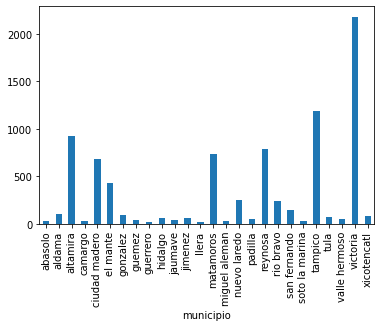

In [28]:
agrupados2["menores_inscritos"].plot(kind="bar")
plt.show()

- Graficar las polizas contratadas por aseguradora

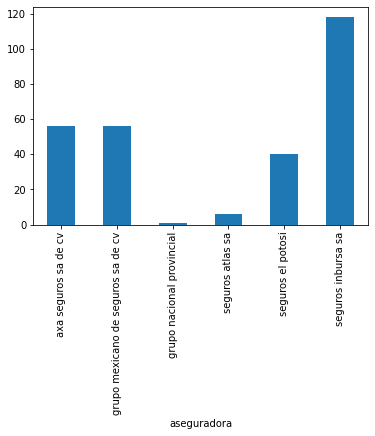

In [29]:
polizasg = polizas.groupby("aseguradora").agg({
   "aseguradora": "count"
})

polizasg["aseguradora"].plot(kind="bar")
plt.show()

- Graficar las Estancias Infantiles aperturadas por ejercicio fiscal

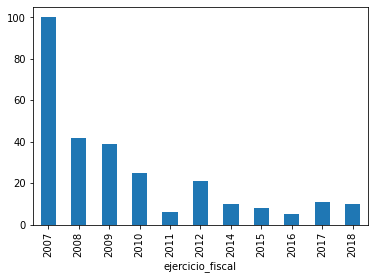

In [30]:
estanciasg = estancias.groupby("ejercicio_fiscal").agg({
   "ejercicio_fiscal": "count"
})

estanciasg["ejercicio_fiscal"].plot(kind="bar")
plt.show()

- Graficar Estancias activas por municipio

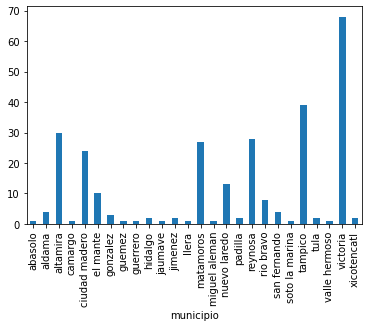

In [31]:
estanciasgm = estancias.groupby("municipio").agg({
   "municipio": "count"
})

estanciasgm["municipio"].plot(kind="bar")
plt.show()

- Boxplots menores inscritos

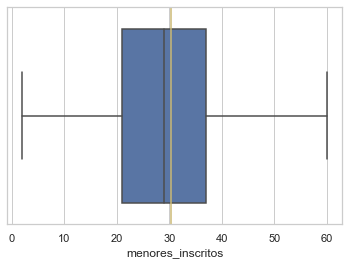

In [32]:
sns.set(style="whitegrid")
sns.boxplot(x=datos_tamaulipas["menores_inscritos"])
plt.axvline(datos_tamaulipas["menores_inscritos"].mean(), c='y');

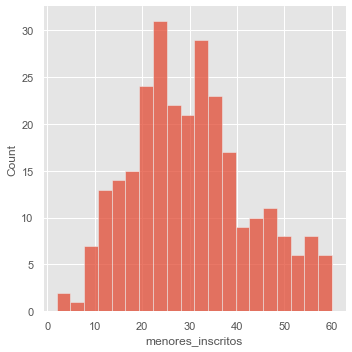

In [33]:
plt.style.use('ggplot')
sns.displot(datos_tamaulipas["menores_inscritos"], kde=False, bins=20);

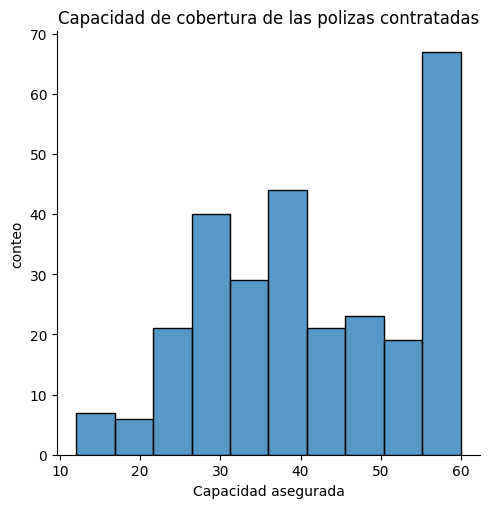

In [34]:
plt.style.use('default')
ax = sns.displot(polizas["capacidad_de_la_poliza"], kde=False)
ax.set(title='Capacidad de cobertura de las polizas contratadas', xlabel='Capacidad asegurada', ylabel='conteo');

In [35]:
by_menores= menores_capital.groupby(level=0)[['edad', 'altura_cm', 'peso_kg']].mean()
sex = menores_capital.groupby(level=0)['sexo'].last()
merged = by_menores.merge(sex, left_index=True, right_index=True)
males = by_menores[merged['sexo'] == 'M']
females = by_menores[merged['sexo'] == 'F']

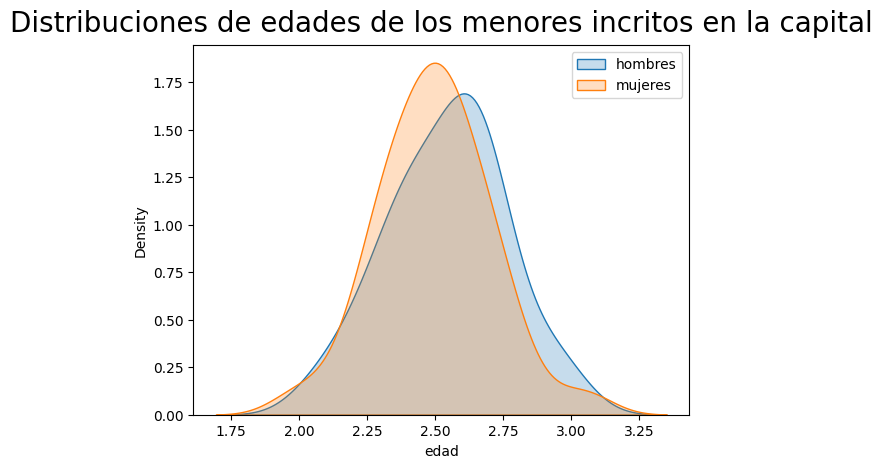

In [36]:
ax = sns.kdeplot(males['edad'], label='hombres',shade=True)
sns.kdeplot(females['edad'],shade=True, ax=ax, label='mujeres')
ax.set_title('Distribuciones de edades de los menores incritos en la capital', fontsize=20, pad=10);
ax.set(xlabel='edad');
ax.legend(loc='upper right');

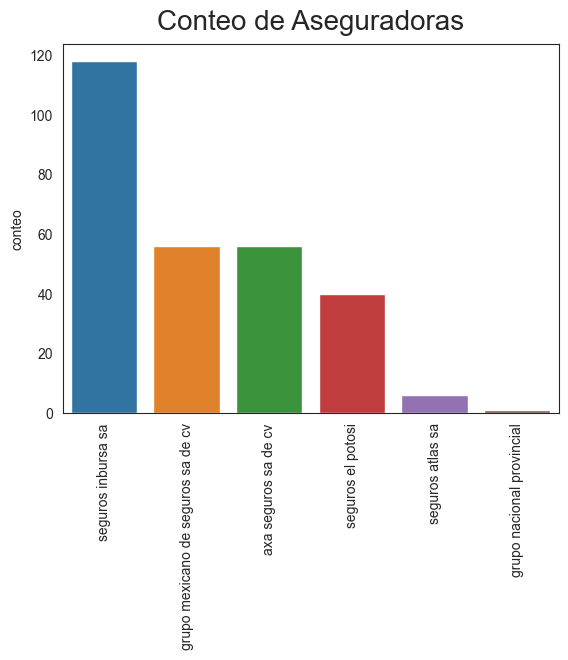

In [37]:
sns.set_style('white')
counts = polizas['aseguradora'].value_counts()
ax = sns.barplot(x=counts.index, y=counts)
ax.set_title('Conteo de Aseguradoras', fontsize=20, pad=10);
ax.set(ylabel='conteo');
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

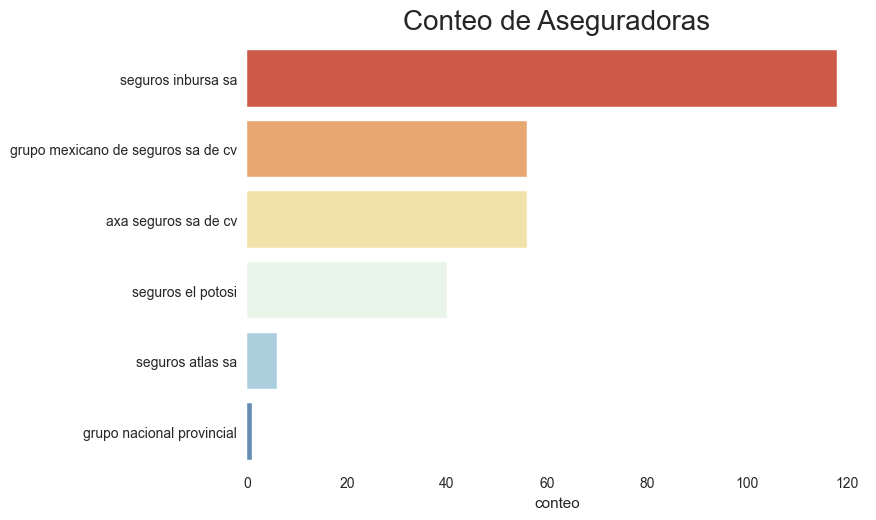

In [83]:
sns.set_style('white')
ax = sns.barplot(x=counts, y=counts.index, orient='h', palette='RdYlBu');
ax.set_title('Conteo de Aseguradoras', fontsize=20, pad=10);
ax.set(xlabel='conteo');

- Tabla de contingencia edad - región de la ciudad

In [39]:
crosstab = pd.crosstab(menores_capital['edad'], menores_capital['region_ciudad'])

crosstab

region_ciudad,centro,conurvada,este,norte,oeste,sur
edad,,,,,,
1,85,100,74,73,143,67
2,89,97,92,70,134,65
3,97,72,81,85,137,65
4,95,95,78,70,145,71


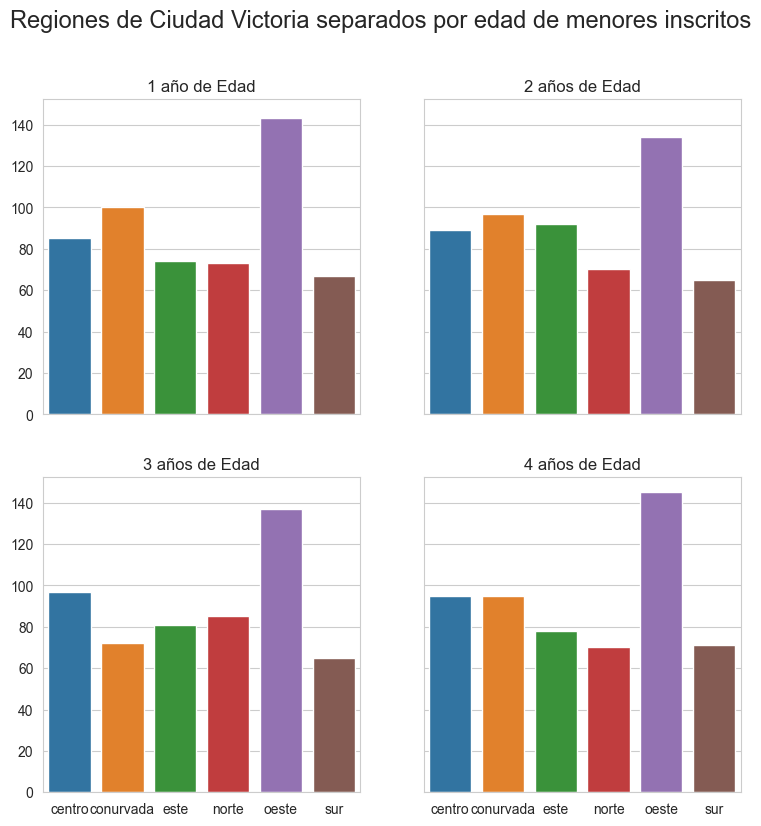

In [40]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(2, 2, figsize=(9, 9), sharex=True, sharey=True)

sns.barplot(x=crosstab.columns, y=crosstab.loc[1], ax=axes[0, 0])
sns.barplot(x=crosstab.columns, y=crosstab.loc[2], ax=axes[0, 1])
sns.barplot(x=crosstab.columns, y=crosstab.loc[3], ax=axes[1, 0])
sns.barplot(x=crosstab.columns, y=crosstab.loc[4], ax=axes[1, 1])

axes[0, 0].set(xlabel='', ylabel='', title='1 año de Edad')
axes[0, 1].set(xlabel='', ylabel='', title='2 años de Edad')
axes[1, 0].set(xlabel='', ylabel='', title='3 años de Edad')
axes[1, 1].set(xlabel='', ylabel='', title='4 años de Edad')

fig.suptitle('Regiones de Ciudad Victoria separados por edad de menores inscritos', fontsize=17);

- correlaciones

In [41]:
victoria = pd.read_csv("victoria.csv")
victoria.corr()

,menores_inscritos,capacidad_instalada,inscripciones_disponibles
menores_inscritos,1.000000,0.673287,-0.407529
capacidad_instalada,0.673287,1.000000,0.400812
inscripciones_disponibles,-0.407529,0.400812,1.000000


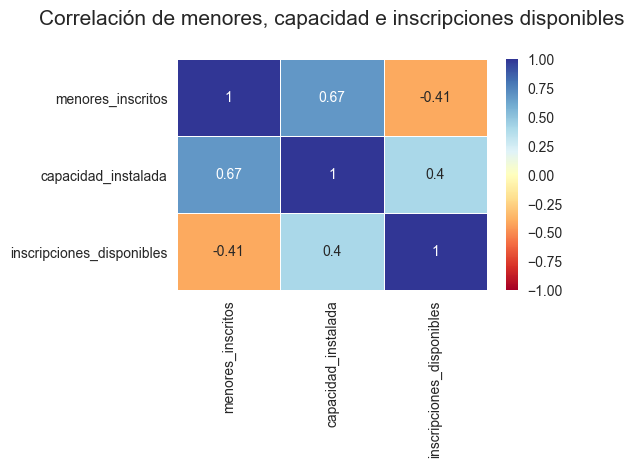

In [80]:
plt.figure(figsize=(5, 3))
ax = sns.heatmap(victoria.corr(), vmin=-1, vmax=1, annot=True, cmap="RdYlBu", linewidths=.5); 
ax.set_title('Correlación de menores, capacidad e inscripciones disponibles', fontsize=15, pad=25);

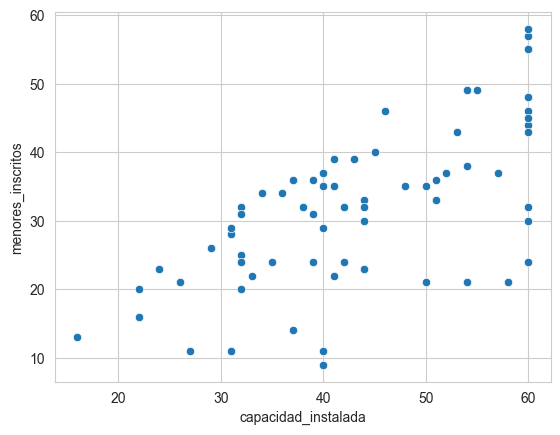

In [43]:
sns.scatterplot(x=victoria['capacidad_instalada'], y=victoria['menores_inscritos']);

In [44]:
victoria['capacidad_instalada'].corr(victoria['menores_inscritos'])

0.6732874472149571

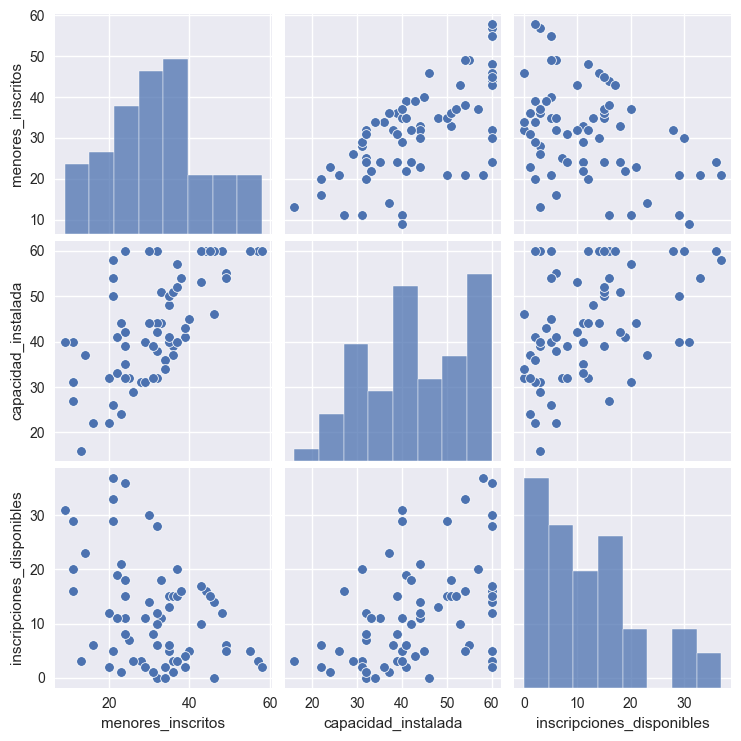

In [79]:
sns.pairplot(victoria);

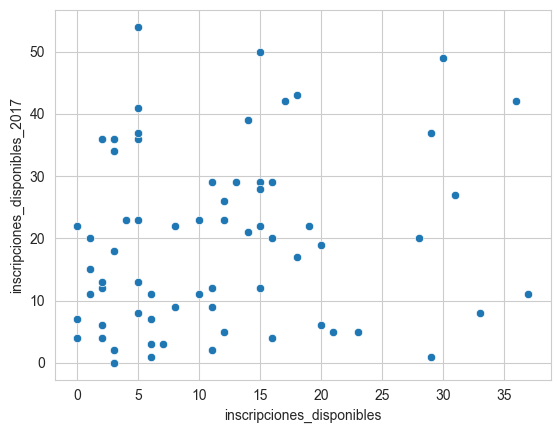

In [46]:
sns.scatterplot(x=estancias_en_victoria["inscripciones_disponibles"],y=estancias_en_victoria["inscripciones_disponibles_2017"]);

In [47]:
estancias_en_victoria["inscripciones_disponibles"].corr(estancias_en_victoria["inscripciones_disponibles_2017"])

0.18133910981860987

Con un coeficiente como éste, es evidente que la relación entre las variables NO es fuerte. No Vale la pena entonces intentar usar la Regresión Linear Simple para predecir la variable `y` a partir de la `x

- scatterplots con variables condicionantes

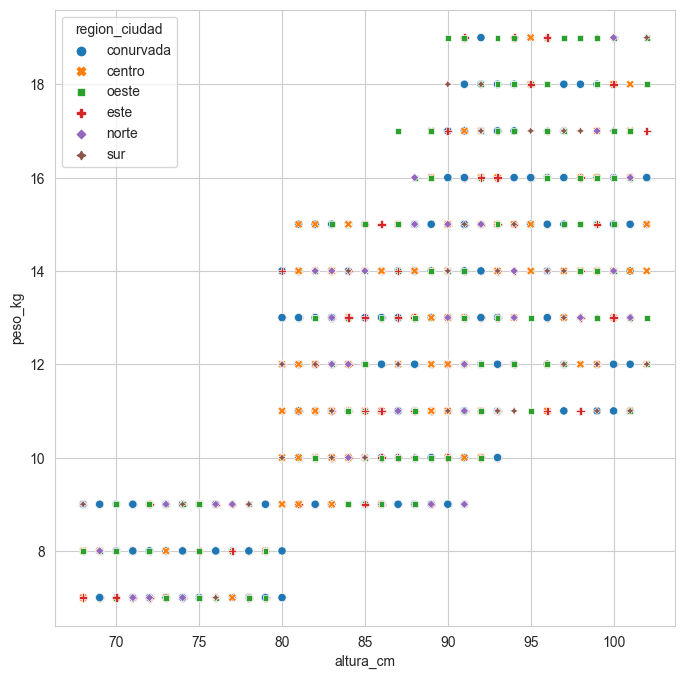

In [48]:
mc_grouped = menores_capital.groupby('nombre')[['edad', 'altura_cm', 'peso_kg', 'region_ciudad', 'sexo']].max()
mc_region = mc_grouped[mc_grouped['region_ciudad'].isin(['centro', 'norte', 'este', 'oeste', 'sur', 'conurvada'])]
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()
sns.scatterplot(x=mc_region['altura_cm'],y=mc_region['peso_kg'], hue=mc_region['region_ciudad'], style=mc_region['region_ciudad'], ax=ax);

In [49]:
centro = mc_region[mc_region['region_ciudad'] == 'centro']
norte = mc_region[mc_region['region_ciudad'] == 'norte']
este = mc_region[mc_region['region_ciudad'] == 'este']
oeste = mc_region[mc_region['region_ciudad'] == 'oeste']
sur = mc_region[mc_region['region_ciudad'] == 'sur']
conurvada = mc_region[mc_region['region_ciudad'] == 'conurvada']

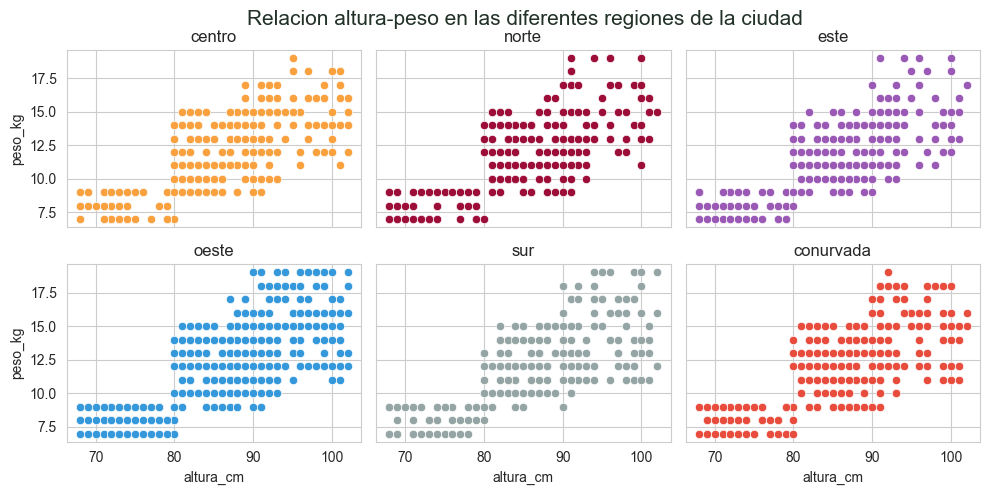

In [50]:
sns.set_style('whitegrid')
palette = ["#F9A03F","#9c0d38", "#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71", "#223127"]

fig = plt.figure(figsize=(10, 5))
axes = fig.subplots(2, 3, sharex=True, sharey=True)

sns.scatterplot(x=centro['altura_cm'],y=centro['peso_kg'], ax=axes[0, 0], color=palette[0])
sns.scatterplot(x=norte['altura_cm'],y=norte['peso_kg'], ax=axes[0, 1], color=palette[1])
sns.scatterplot(x=este['altura_cm'],y=este['peso_kg'], ax=axes[0, 2], color=palette[2])
sns.scatterplot(x=oeste['altura_cm'],y=oeste['peso_kg'], ax=axes[1, 0], color=palette[3])
sns.scatterplot(x=sur['altura_cm'],y=sur['peso_kg'], ax=axes[1, 1], color=palette[4])
sns.scatterplot(x=conurvada['altura_cm'],y=conurvada['peso_kg'], ax=axes[1, 2], color=palette[5]);

axes[0, 0].set_title('centro')
axes[0, 1].set_title('norte')
axes[0, 2].set_title('este')
axes[1, 0].set_title('oeste')
axes[1, 1].set_title('sur')
axes[1, 2].set_title('conurvada')

fig.suptitle('Relacion altura-peso en las diferentes regiones de la ciudad', fontsize=15, c=palette[8], x=0.53)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

In [75]:
mc_grouped['conteo'] = 1
mc_conteo = mc_grouped[mc_grouped['region_ciudad'].isin(['centro', 'norte', 'este', 'oeste', 'sur', 'conurvada'])]
conteos_validados = mc_conteo.groupby(['region_ciudad', 'sexo'])['count'].sum()
conteos_validados = conteos_validados.unstack(1)
conteos_validados

sexo,F,M
region_ciudad,,
centro,159,139
conurvada,147,161
este,126,135
norte,135,131
oeste,246,266
sur,135,126


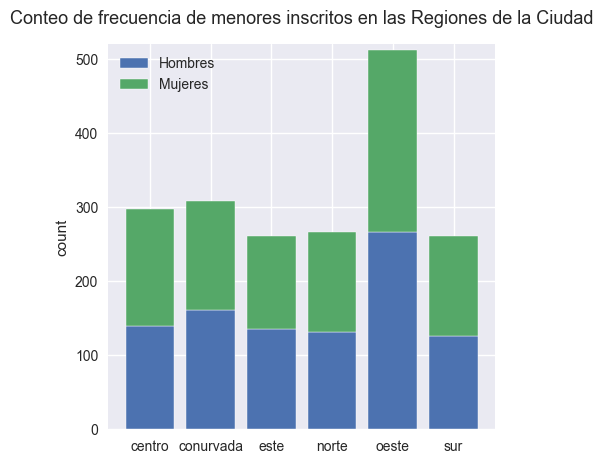

In [77]:
plt.style.use('seaborn')

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

plt1 = ax.bar(conteos_validados.index, conteos_validados['M'], label='M')
plt2 = ax.bar(conteos_validados.index, conteos_validados['F'], bottom=conteos_validados['M'])

ax.set_ylabel('count')
ax.set_title('Conteo de frecuencia de menores inscritos en las Regiones de la Ciudad', fontsize=13, pad=15);
plt.legend((plt1[0], plt2[0]), ('Hombres', 'Mujeres'));
ax.set_ylim(0, 520);

### Serie de tiempo

In [86]:
def transformarSerieADataset(serie, elementosPorMuestra):
    dataset = None
    salidasDataset = None
    for counter in range (len(serie)-elementosPorMuestra-1):        
        muestra = np.array([serie[counter:counter+elementosPorMuestra]])        
        salida = np.array([serie[counter+elementosPorMuestra]])
        if dataset is None:
            dataset = muestra
        else:
            dataset = np.append(dataset,muestra,axis = 0)
        if salidasDataset is None:
            salidasDataset = salida    
        else:        
            salidasDataset = np.append(salidasDataset,salida)
    return dataset, salidasDataset

### - Guardado de datos

-para guardar cualquiera de las consultas, se utiliza df.to_csv("nombre_del_archivo.csv")

-Por ejemplo Guardar la consulta de Estancias en el municipio de Victoria

In [52]:
#est_vic= datos_tamaulipas[datos_tamaulipas["municipio"] == "victoria"]
#est_vic.to_csv("estancias_en_victoria.csv")
